> *Alberto Ferrari* - [github](https://albertoferrari.github.io/)

![Pandas](pandas.png)

### importazione libreria

In [1]:
import pandas as pd

## Series

![Series](series.svg)

#### creazione Series

In [2]:
# lista dati e index
raggioPianeti = pd.Series([6371,3389.5,6051.8,69911], index=['terra','marte','venere','giove'])
print(raggioPianeti)

terra      6371.0
marte      3389.5
venere     6051.8
giove     69911.0
dtype: float64


In [3]:
# dizionario <indice>: <valore>
distanzaSole = pd.Series({'terra': 149.6, 'marte': 227.9, 'venere': 108.2})
print(distanzaSole)

terra     149.6
marte     227.9
venere    108.2
dtype: float64


#### accesso ai dati

In [4]:
print('raggio di Marte',raggioPianeti['marte'])
print('distanze dal Sole:')
print(distanzaSole[1:3])
print('raggio dei pianeti:')
print(raggioPianeti['terra':'venere'])

raggio di Marte 3389.5
distanze dal Sole:
marte     227.9
venere    108.2
dtype: float64
raggio dei pianeti:
terra     6371.0
marte     3389.5
venere    6051.8
dtype: float64


In [5]:
# distanti dal sole più della terra?
dt = distanzaSole['terra']
print(distanzaSole > dt)

terra     False
marte      True
venere    False
dtype: bool


In [6]:
# pianeti più piccoli della terra
rt = raggioPianeti['terra']
print(raggioPianeti[raggioPianeti < rt])

marte     3389.5
venere    6051.8
dtype: float64


#### statistiche su Series

In [7]:
print('raggio del pianeta più piccolo: ',raggioPianeti.min())
print('nome del pianeta più grande: ',raggioPianeti.idxmax())

raggio del pianeta più piccolo:  3389.5
nome del pianeta più grande:  giove


## DataFrame

![DataFrame](dataframe.png)

#### creazione DataFrame

In [8]:
# lista di tuple e lista per indice
pianetiBis = pd.DataFrame([('terra', 6371, 149.6),
                           ('marte', 3389.5, 227.9),
                           ('venere', 6051.8, 108.2)],
                    columns=['pianeta','raggio', 'distanza'])
pianetiBis.set_index('pianeta', inplace=True)
print(pianetiBis)

         raggio  distanza
pianeta                  
terra    6371.0     149.6
marte    3389.5     227.9
venere   6051.8     108.2


### DataFrame da file csv

In [9]:
# la prima riga del file contiene il nome delle colonne
iris = pd.read_csv("iris.csv")

In [10]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [12]:
# nel file (iris_no_names.csv) non è presente la riga con i nomi delle colonne
iris = pd.read_csv("iris_no_names.csv", 
                   header=None, 
                   names=["lung.sepalo","larg.sepalo","lung.petalo","larg.petalo","specie"])

In [13]:
print(iris)

     lung.sepalo  larg.sepalo  lung.petalo  larg.petalo     specie
0            5.1          3.5          1.4          0.2     Setosa
1            4.9          3.0          1.4          0.2     Setosa
2            4.7          3.2          1.3          0.2     Setosa
3            4.6          3.1          1.5          0.2     Setosa
4            5.0          3.6          1.4          0.2     Setosa
..           ...          ...          ...          ...        ...
145          6.7          3.0          5.2          2.3  Virginica
146          6.3          2.5          5.0          1.9  Virginica
147          6.5          3.0          5.2          2.0  Virginica
148          6.2          3.4          5.4          2.3  Virginica
149          5.9          3.0          5.1          1.8  Virginica

[150 rows x 5 columns]


In [14]:
# primo dato
print(iris.loc[0])

lung.sepalo       5.1
larg.sepalo       3.5
lung.petalo       1.4
larg.petalo       0.2
specie         Setosa
Name: 0, dtype: object


In [15]:
# informazioni dei dati 3,10,22
print(iris.loc[[3,10,22]])

    lung.sepalo  larg.sepalo  lung.petalo  larg.petalo  specie
3           4.6          3.1          1.5          0.2  Setosa
10          5.4          3.7          1.5          0.2  Setosa
22          4.6          3.6          1.0          0.2  Setosa


In [17]:
# nomi delle colonne
iris.columns

Index(['lung.sepalo', 'larg.sepalo', 'lung.petalo', 'larg.petalo', 'specie'], dtype='object')

#### informazioni associate a un DataFrame

In [23]:
iris.describe()

lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
count   150.000000   150.000000   150.000000   150.000000
mean      5.843333     3.057333     3.758000     1.199333
std       0.828066     0.435866     1.765298     0.762238
min       4.300000     2.000000     1.000000     0.100000
25%       5.100000     2.800000     1.600000     0.300000
50%       5.800000     3.000000     4.350000     1.300000
75%       6.400000     3.300000     5.100000     1.800000
max       7.900000     4.400000     6.900000     2.500000

In [25]:
iris.sort_values("lung.petalo")           # ordinamento - non modifica

lung.sepalo  larg.sepalo  lung.petalo  larg.petalo     specie
22           4.6          3.6          1.0          0.2     Setosa
13           4.3          3.0          1.1          0.1     Setosa
14           5.8          4.0          1.2          0.2     Setosa
35           5.0          3.2          1.2          0.2     Setosa
36           5.5          3.5          1.3          0.2     Setosa
..           ...          ...          ...          ...        ...
131          7.9          3.8          6.4          2.0  Virginica
105          7.6          3.0          6.6          2.1  Virginica
117          7.7          3.8          6.7          2.2  Virginica
122          7.7          2.8          6.7          2.0  Virginica
118          7.7          2.6          6.9          2.3  Virginica

[150 rows x 5 columns]

### raggruppamento

In [26]:
raggruppamento  = iris.groupby("specie")
print("valori medi")
print(raggruppamento.mean())
print()
print("valori massimi")
print(raggruppamento.max())

valori medi
            lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
specie                                                        
Setosa            5.006        3.428        1.462        0.246
Versicolor        5.936        2.770        4.260        1.326
Virginica         6.588        2.974        5.552        2.026

valori massimi
            lung.sepalo  larg.sepalo  lung.petalo  larg.petalo
specie                                                        
Setosa              5.8          4.4          1.9          0.6
Versicolor          7.0          3.4          5.1          1.8
Virginica           7.9          3.8          6.9          2.5


## plot

<AxesSubplot:xlabel='lung.petalo', ylabel='larg.petalo'>

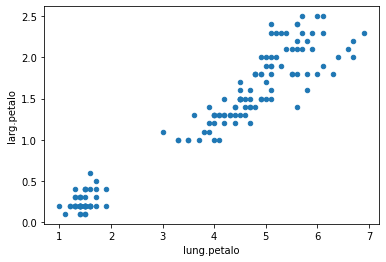

In [27]:
import matplotlib.pyplot as plt
iris.plot(x="lung.petalo",y="larg.petalo",kind="scatter")